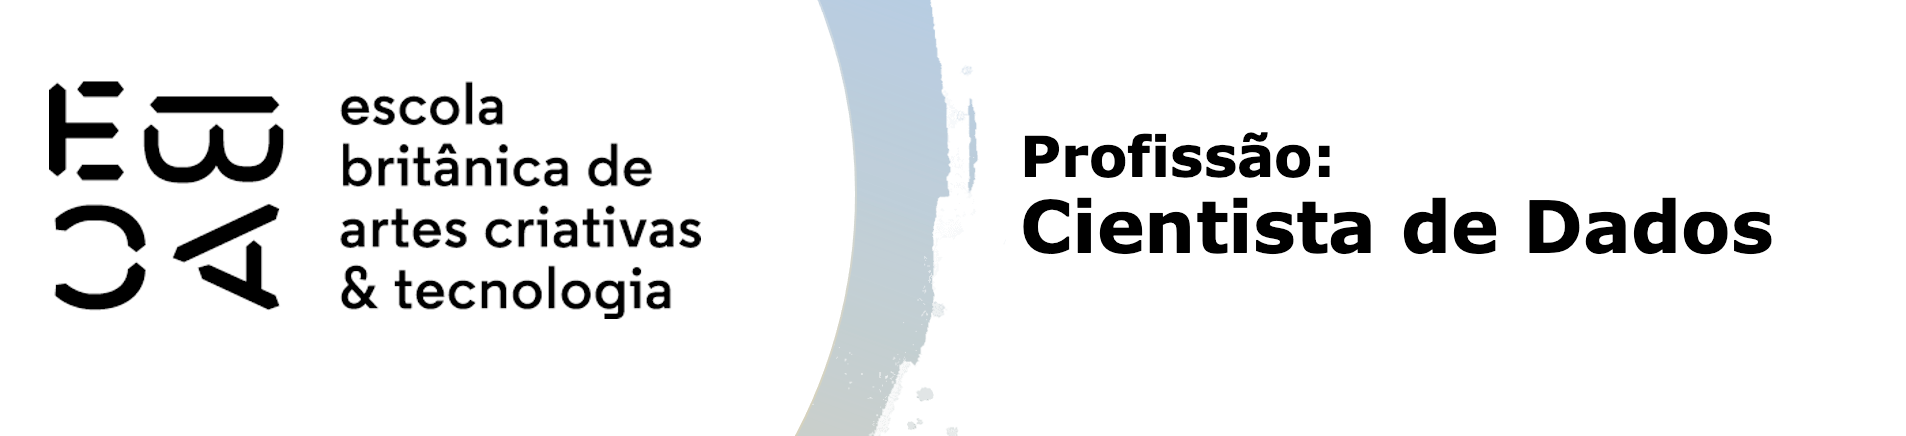

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#Use caso esteja no jupyter notebook ou no ipython
%matplotlib inline

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [31]:
df.describe()

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,750000,750000.000000,750000.000000,750000.000000,624043.000000,750000.000000,7.500000e+05
mean,2015-08-01 06:24:00,8319.272793,0.433251,43.804733,7.748574,2.212241,2.323854e+04
min,2015-01-01 00:00:00,0.000000,0.000000,22.000000,0.117808,1.000000,1.076700e+02
25%,2015-04-01 00:00:00,4147.000000,0.000000,34.000000,3.049315,2.000000,3.467700e+03
50%,2015-08-01 00:00:00,8324.000000,0.000000,43.000000,6.046575,2.000000,7.861820e+03
75%,2015-12-01 00:00:00,12487.000000,1.000000,53.000000,10.183562,3.000000,1.831828e+04
max,2016-03-01 00:00:00,16649.000000,14.000000,68.000000,42.906849,15.000000,4.083986e+06
std,NaN,4809.281774,0.739379,11.229868,6.687455,0.903428,7.910601e+04


In [20]:
print(df.mau.value_counts(), df.mau.value_counts(normalize=True))

mau
False    691357
True      58643
Name: count, dtype: int64 mau
False    0.921809
True     0.078191
Name: proportion, dtype: float64


In [21]:
df.dtypes

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                 object
posse_de_imovel                  object
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
mau                                bool
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [23]:
# Verificando se há linhas duplicadas

df.duplicated().sum()

469661

**Atenção:** Não sei qual a razão do dataset estar com linhas duplicadas.

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
# Verificando se há linhas duplicadas novamente

df.duplicated().sum()

0

In [26]:
df.shape

(280339, 15)

In [27]:
# buscar a data máxima, para filtrar o holdout

data_max = df['data_ref'].max()
print(data_max)
data_beg_holdout = data_max - pd.DateOffset(months=3)

# separando a safra de validação out of time (oot)

base_holdout = df[df['data_ref'] >= data_beg_holdout]
df = df[df['data_ref'] < data_beg_holdout]

2016-03-01 00:00:00


In [28]:
print('Conjunto de dados para modelagem (treino e teste): ' + str(df.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(base_holdout.shape))

Conjunto de dados para modelagem (treino e teste): (198946, 15)
Conjunto de dados não usados no treino/teste, apenas como validação: (81393, 15)


In [39]:
base_holdout.to_feather("./base_holdout.ftr")

In [36]:
df[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']].mode()

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,F,N,S,Assalariado,Médio,Casado,Casa


In [37]:
df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].median()

qtd_filhos                  0.000000
idade                      43.000000
tempo_emprego               6.046575
qt_pessoas_residencia       2.000000
renda                    7861.820000
dtype: float64

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [14]:
df.loc[:,'Ano'] = df['data_ref'].dt.year
df.loc[:,'Mes'] = df['data_ref'].dt.month

In [15]:
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,Ano,Mes
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False,2015,1
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False,2015,1
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False,2015,1
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False,2015,1
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False,2015,1


### Número de linhas para cada mês

In [16]:
df.groupby(['Ano','Mes'])['data_ref'].count().to_frame().T

Ano        2015                                                          \
Mes          1      2      3      4      5      6      7      8      9    
data_ref  20066  19428  18714  17993  17398  17091  16998  17100  17417   

Ano                     
Mes          10     11  
data_ref  17948  18793

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [17]:
atributos_num = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau']

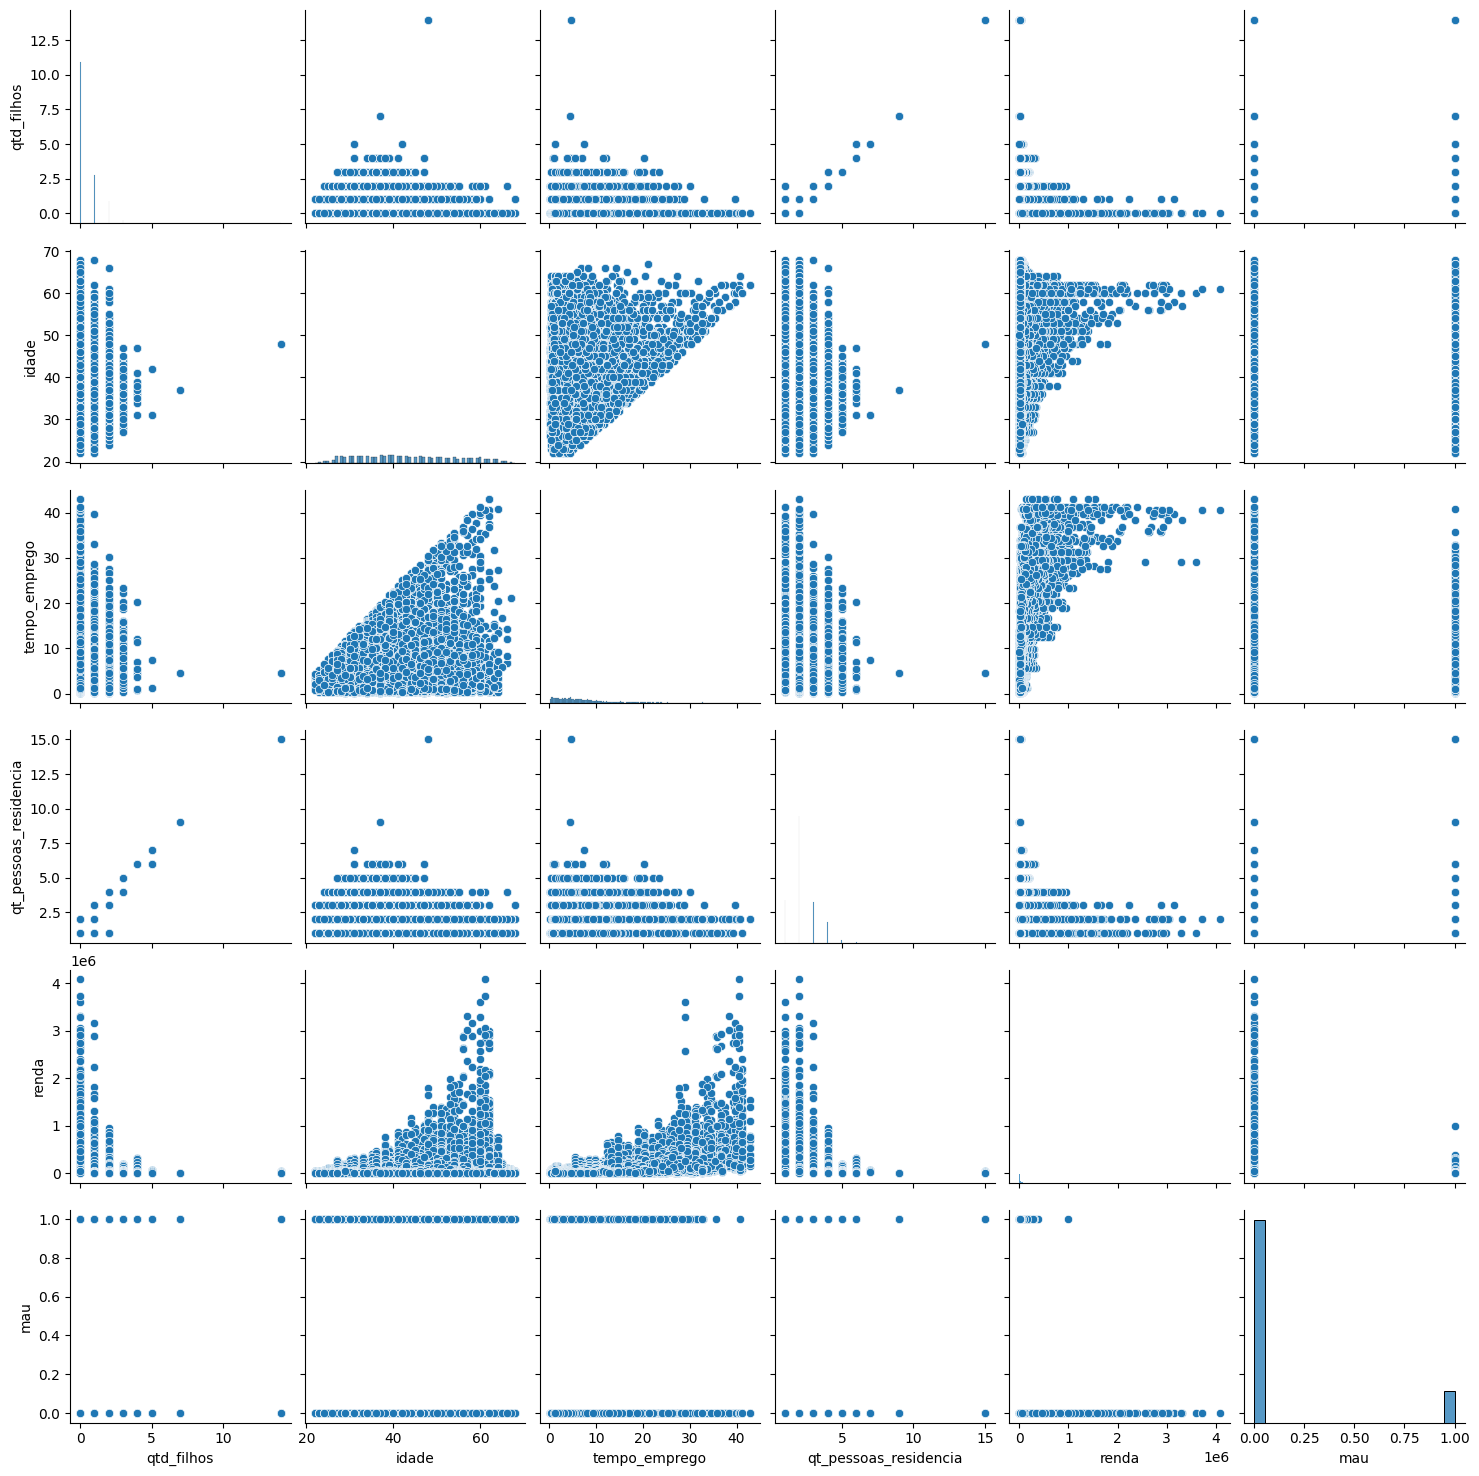

In [18]:
sns.pairplot(df[atributos_num]) # somente para atribuitos numéricos

In [19]:
atributos_cat = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

**Frequências dos atributos categóricos:**<br/>
sexo<br/>
F    504580<br/>
M    245420<br/>
<br/>
tipo_renda<br/>
Assalariado         385740<br/>
Empresário          172712<br/>
Pensionista         126265<br/>
Servidor público     64922<br/>
Bolsista               361<br/>
<br/>
educacao<br/>
Médio                  506836<br/>
Superior completo      204306<br/>
Superior incompleto     29471<br/>
Fundamental              8575<br/>
Pós graduação             812<br/>
<br/>
estado_civil<br/>
Casado      526472<br/>
Solteiro     91659<br/>
União        57685<br/>
Separado     42571<br/>
Viúvo        31613<br/>
<br/>
tipo_residencia<br/>
Casa             674294<br/>
Com os pais       33232<br/>
Governamental     23440<br/>
Aluguel           10349<br/>
Estúdio            5395<br/>
Comunitário        3290<br/>

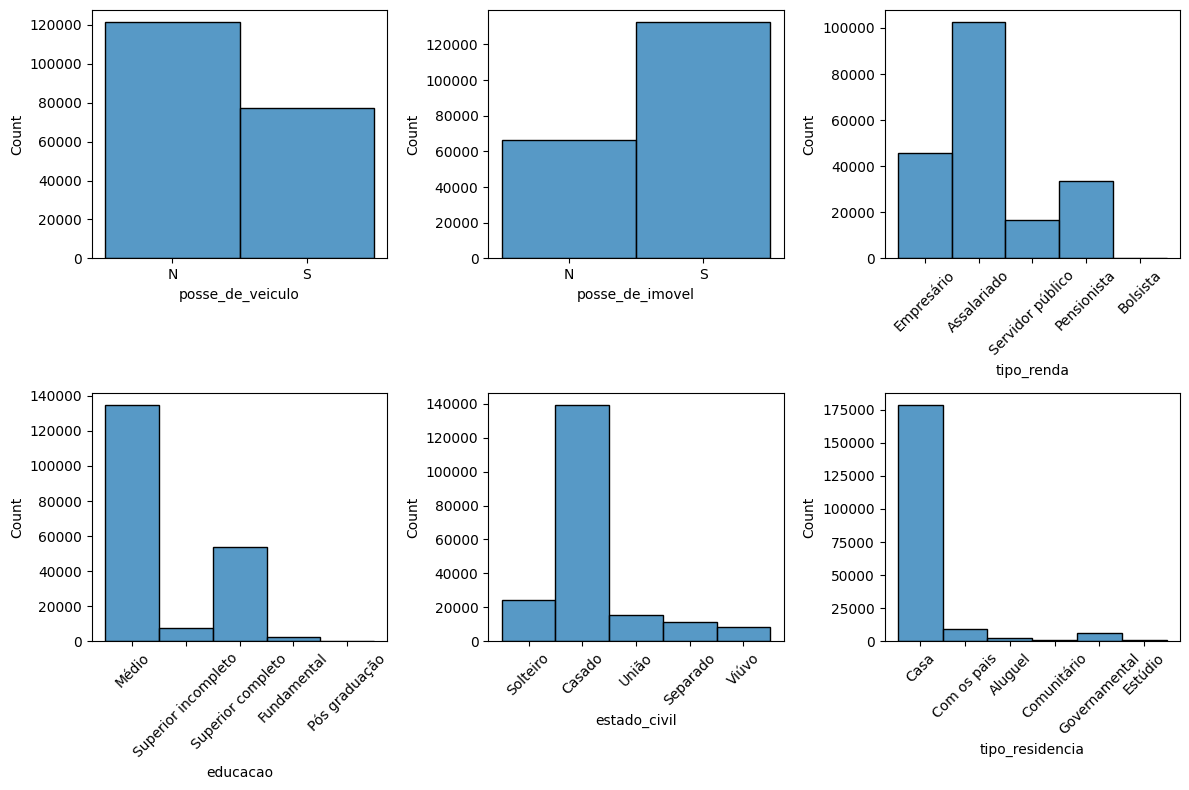

In [20]:
# Tamanho da imagem principal em polegadas
plt.figure(figsize = ((12, 8)))
#Gráfico 1:
plt.subplot(2,3,1)
# sns.histplot(data=df, x='posse_de_veiculo', hue='sexo')
sns.histplot(data=df, x='posse_de_veiculo')

#Gráfico 2:
plt.subplot(2,3,2)
# sns.histplot(data=df, x='posse_de_imovel', hue='sexo')
sns.histplot(data=df, x='posse_de_imovel')

#Gráfico 3:
plt.subplot(2,3,3)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='tipo_renda', hue='sexo')
sns.histplot(data=df, x='tipo_renda')

#Gráfico 4:
plt.subplot(2,3,4)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='educacao', hue='sexo')
sns.histplot(data=df, x='educacao')

#Gráfico 5:
plt.subplot(2,3,5)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='estado_civil', hue='sexo')
sns.histplot(data=df, x='estado_civil')

#Gráfico 6:
plt.subplot(2,3,6)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='tipo_residencia', hue='sexo')
sns.histplot(data=df, x='tipo_residencia')

# Adjust spacing between subplots
plt.tight_layout()

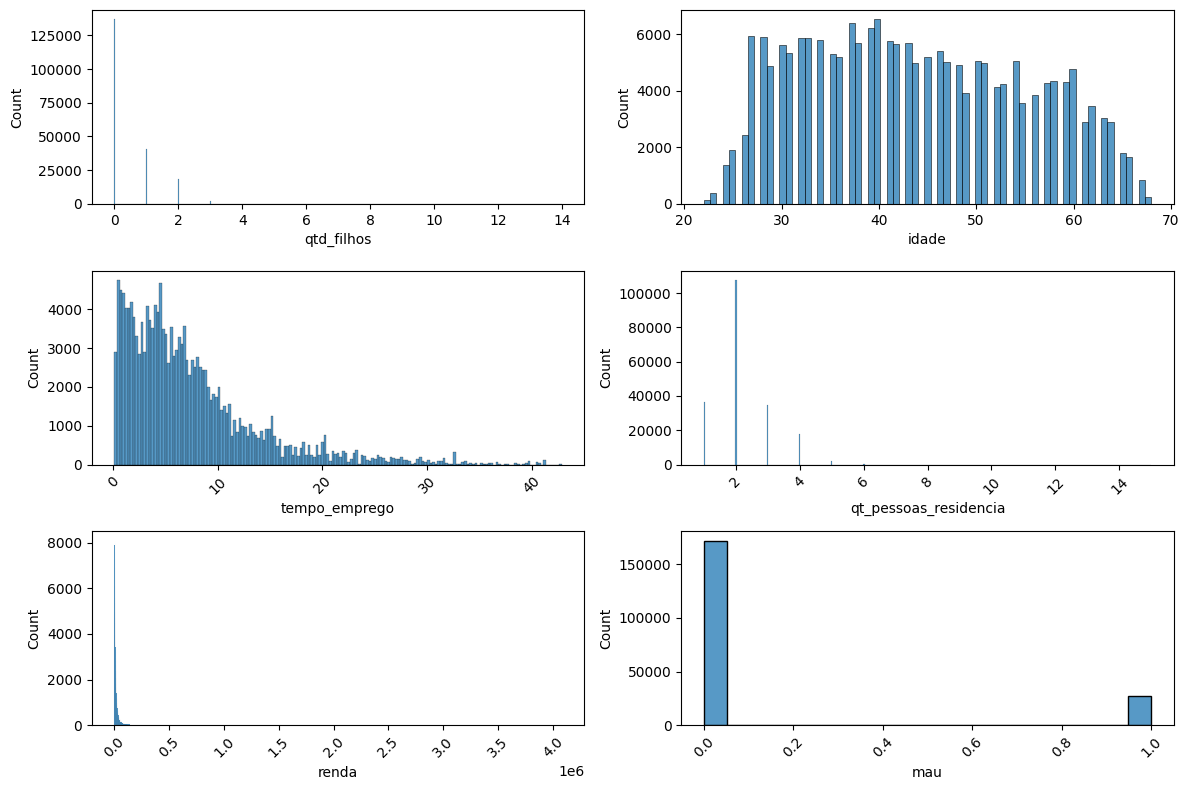

In [21]:
# histograma dos atributos numéricos
#['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau']
# Tamanho da imagem principal em polegadas
plt.figure(figsize = ((12, 8)))
#Gráfico 1:
plt.subplot(3,2,1)
# sns.histplot(data=df, x='posse_de_veiculo', hue='sexo')
sns.histplot(data=df, x='qtd_filhos')

#Gráfico 2:
plt.subplot(3,2,2)
# sns.histplot(data=df, x='posse_de_imovel', hue='sexo')
sns.histplot(data=df, x='idade')

#Gráfico 3:
plt.subplot(3,2,3)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='tipo_renda', hue='sexo')
sns.histplot(data=df, x='tempo_emprego')

#Gráfico 4:
plt.subplot(3,2,4)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='educacao', hue='sexo')
sns.histplot(data=df, x='qt_pessoas_residencia')

#Gráfico 5:
plt.subplot(3,2,5)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='estado_civil', hue='sexo')
sns.histplot(data=df, x='renda')

#Gráfico 6:
plt.subplot(3,2,6)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# sns.histplot(data=df, x='tipo_residencia', hue='sexo')
sns.histplot(data=df, x='mau')

# Adjust spacing between subplots
plt.tight_layout()

In [22]:
df.describe()

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,Ano,Mes
count,198946,198946.000000,198946.000000,198946.000000,165297.000000,198946.000000,1.989460e+05,198946.0,198946.000000
mean,2015-05-29 11:44:17.159228928,8344.088707,0.435575,43.696013,7.387073,2.213490,2.589356e+04,2015.0,5.907704
min,2015-01-01 00:00:00,0.000000,0.000000,22.000000,0.117808,1.000000,1.618600e+02,2015.0,1.000000
25%,2015-03-01 00:00:00,4175.000000,0.000000,34.000000,2.810959,2.000000,4.419990e+03,2015.0,3.000000
50%,2015-06-01 00:00:00,8361.000000,0.000000,43.000000,5.706849,2.000000,9.434210e+03,2015.0,6.000000
75%,2015-09-01 00:00:00,12509.000000,1.000000,53.000000,9.761644,3.000000,2.068388e+04,2015.0,9.000000
max,2015-11-01 00:00:00,16649.000000,14.000000,68.000000,42.906849,15.000000,4.083986e+06,2015.0,11.000000
std,NaN,4807.292857,0.741711,11.280497,6.474678,0.906372,8.448308e+04,0.0,3.223902


**Conclusão:** A variável `tempo_emprego` contém outliers.

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

### Valores ausentes

### Outliers

**Observação:** Partir-se da premissa que os atribuos numéricos têm distribuição normal.

### Zeros estruturais

### Categorização de variáveis

Supõe-se que `Renda` seja um atributo muito importante para estimar o `mau`.

In [23]:
df.groupby(['mau'])['renda'].mean()

mau
False    28798.756033
True      7262.961261
Name: renda, dtype: float64

<Axes: xlabel='renda', ylabel='Count'>

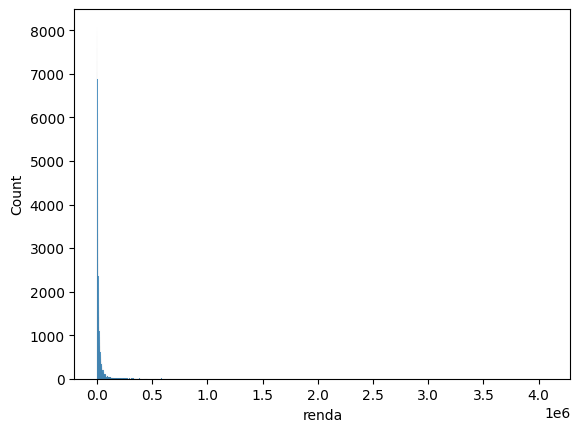

In [24]:
# Histograma de Renda

sns.histplot(data=df, x='renda')

In [25]:
df['renda_cat'] = pd.cut(df['renda'], bins=[0., 1e3, 1e4, 1e5, np.inf], labels=['1k', '10k', '100k', '1000k'])

In [26]:
df['renda_cat'].value_counts()

renda_cat
10k      99878
100k     87224
1000k     8181
1k        3663
Name: count, dtype: int64

In [27]:
df.head(2)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,Ano,Mes,renda_cat
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False,2015,1,10k
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False,2015,1,10k


**Questão:** Não poderia estratificar uma variável dependente em tipo de distribuição por categoria, pois o `mau` já é desbalanceado.

____________

## # Parte 1: Análise de Dados Exploratória (Opcional)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile

## # Parte 2: Pré-processamento dos Dados

Lidando com variáveis ​​​​categóricas onde iremos convertê-las em variáveis ​​​​fictícias. vamos usar duas técnicas:<br/>
- Label encoding
- One hot Encoding

# Separando os dados em treino e teste

## # Parte 3: Criação do modelo

# Criação de um Pipeline

**ATENÇÃO:** Executar as primeiras linhas até a divisão do conjunto de dados 'hold-out'

In [28]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau', 'Ano', 'Mes', 'renda_cat'],
      dtype='object')

In [29]:
num_att = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
ord_att = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'educacao']
cat_att = ['tipo_renda', 'estado_civil', 'tipo_residencia']

In [30]:
# Variáveis independentes (características)

X = df.drop(['mau'], axis=1)
X_new = base_holdout.drop(['mau'], axis=1)

# Variável dependente (alvo)

y = df['mau']
y_new = base_holdout['mau']


In [31]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=1,
                                                    stratify=y) # mantém as proporções entre as classes do target

#### Aplicando o Pipeline em pré-processamento

In [32]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [33]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_median", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

ordinal_preprocessor = Pipeline(
    steps=[
        ("imputation_most_frequent", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("ordinal", OrdinalEncoder()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_most_frequent",
            SimpleImputer(fill_value="missing", strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_att),
        ("numerical", numeric_preprocessor, num_att),
        ("ordinal", ordinal_preprocessor, ord_att),
    ]
)

In [34]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [35]:
X_test_transformed = preprocessor.transform(X_test)

In [36]:
X_train_transformed[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.58483015,  0.29195729,  2.71047452, -1.33603356,
        5.10274185,  0.        ,  1.        ,  1.        ,  3.        ])

In [37]:
X_train.shape

(139262, 17)

In [38]:
X_train_transformed.shape

(139262, 25)

In [39]:
X_train = X_train_transformed
X_test = X_test_transformed

#### Remoção dos Outliers

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest

# Define a dictionary to store the results
results = {
    'Contamination': ['auto', 0.5, 0.1, 0.05, 0.001],
    'Num_Outliers': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

# Iterate over contamination values
for contamination in results['Contamination']:

    # Create Isolation Forest model with specified contamination parameter
    if contamination == 'auto':
        model = IsolationForest(contamination=contamination)
    else:
        model = IsolationForest(contamination=contamination, random_state=42)
        
      
    # Fit the model
    model.fit(X_train)
    
    # Predict outliers (-1) and inliers (1)
    predictions = model.predict(X_train)
    
    # Calculate number of outliers
    num_outliers = (predictions == -1).sum()
    results['Num_Outliers'].append(num_outliers)
    
    # Remove outliers from X_train and y_train
    X_clean = X_train[predictions == 1]
    y_clean = y_train[predictions == 1]

    # Train Random Forest Classifier model
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_clean, y_clean)
    
    # Predict on X_test
    y_pred = rfc.predict(X_test)

    # Calculate Precision, Recall and F1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1'].append(f1)

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

  Contamination  Num_Outliers  Precision    Recall        F1
0          auto         29739   0.058899  0.034157  0.043239
1           0.5         69631   0.079910  0.030928  0.044596
2           0.1         13926   0.057245  0.037635  0.045414
3          0.05          6961   0.058635  0.040864  0.048163
4         0.001           135   0.054761  0.039498  0.045894


In [42]:
# Atribuir parâmetro de contaminação definitivo à base de treino

contamination = 0.05 # escolher o parâmetro pelo critério do F1
model = IsolationForest(contamination=contamination)
model.fit(X_train)
predictions = model.predict(X_train)
X_clean = X_train[predictions == 1]
y_clean = y_train[predictions == 1]

In [43]:
# Retornando aos nomes originais

X_train_transformed = X_clean
y_train = y_clean

In [44]:
X_train_transformed.shape

(132300, 25)

#### Aplicando o modelo 2: RandomForestClassifier

In [45]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state = 42)
model_2.fit(X_train_transformed, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [46]:
y_pred = model_2.predict(X_train_transformed)

In [47]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94    114337
        True       0.74      0.35      0.48     17963

    accuracy                           0.90    132300
   macro avg       0.82      0.67      0.71    132300
weighted avg       0.88      0.90      0.88    132300



In [48]:
# aplicando o modelo na base de testes

y_pred = model_2.predict(X_test_transformed)

#### Plotagem

In [49]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

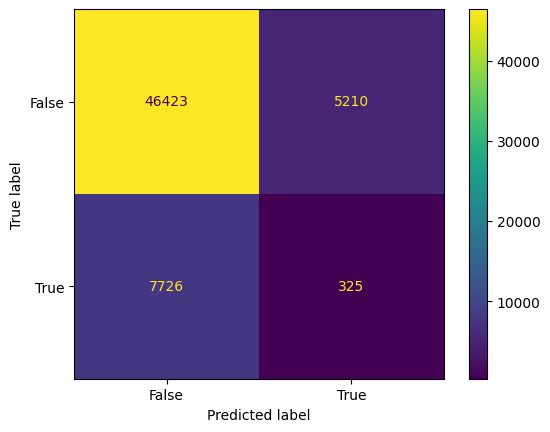

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model_2.classes_)
disp.plot()
plt.show()

In [51]:
model_2.feature_importances_

array([5.52675645e-03, 8.89907598e-05, 5.22883308e-03, 1.76980246e-03,
       3.05852260e-03, 4.99045401e-03, 2.81267157e-03, 3.76059153e-03,
       3.76140216e-03, 1.80412819e-03, 1.08757093e-03, 3.00634526e-03,
       1.86841973e-03, 4.53092123e-04, 4.69424349e-04, 1.77495485e-03,
       1.04029407e-02, 1.10023785e-01, 1.30459912e-01, 1.28226091e-02,
       6.43854023e-01, 1.09300277e-02, 1.28867186e-02, 9.53846183e-03,
       1.76195618e-02])

In [52]:
num_att

['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

**Conclusão:** Os atributos mais importantes, na ordem decrescente, são: `renda`, `tempo_emprego` e `idade`.

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [53]:
X_new_transformed = preprocessor.transform(X_new)

In [54]:
# aplicando o modelo na base de testes

y_pred = model_2.predict(X_new_transformed)

In [55]:
print(metrics.classification_report(y_new, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.90      0.83     61345
        True       0.34      0.15      0.21     20048

    accuracy                           0.72     81393
   macro avg       0.55      0.53      0.52     81393
weighted avg       0.66      0.72      0.68     81393



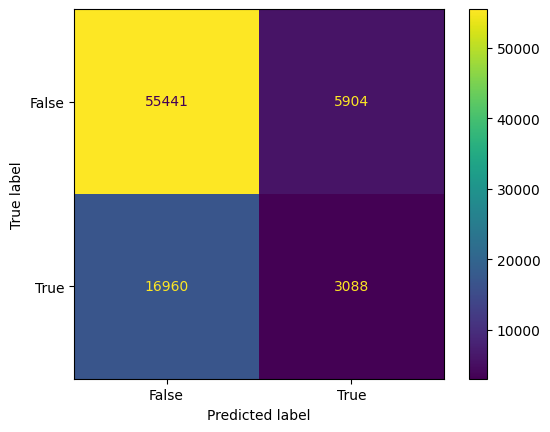

In [56]:
cm = confusion_matrix(y_new, y_pred, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model_2.classes_)
disp.plot()
plt.show()

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [2]:
import pandas as pd

In [3]:
# Chamando o conjunto de dados novamente

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [4]:
df.dtypes

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                 object
posse_de_imovel                  object
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
mau                                bool
dtype: object

In [5]:
from pycaret.classification import *

In [6]:
clf = setup(data=df, target='mau', session_id=123, numeric_imputation='median', categorical_features = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                                                                                                        'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'],
            numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
            ordinal_features = { 'educacao' : ['Fundamental', 'Médio', 'Superior incompleto', 'Superior completo', 'Pós graduação'] }, 
            ignore_features = ['index'], fix_imbalance = True, 
            remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 15)"
4,Transformed data shape,"(1144832, 33)"
5,Transformed train set shape,"(919832, 33)"
6,Transformed test set shape,"(225000, 33)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,5


In [7]:
# Criando o modelo proposto na Tarefa

lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9095,0.7685,0.1761,0.3458,0.2334,0.1907,0.2030
1,0.9089,0.7850,0.1971,0.3522,0.2527,0.2083,0.2183
2,0.9084,0.7765,0.1810,0.3394,0.2361,0.1922,0.2030
3,0.9086,0.7781,0.1705,0.3346,0.2259,0.1828,0.1946
4,0.9094,0.7812,0.1924,0.3543,0.2494,0.2057,0.2166
5,0.9105,0.7747,0.1790,0.3561,0.2383,0.1962,0.2094
6,0.9098,0.7816,0.1812,0.3514,0.2392,0.1964,0.2086
7,0.9091,0.7756,0.1817,0.3457,0.2382,0.1948,0.2063
8,0.9107,0.7765,0.1778,0.3573,0.2375,0.1957,0.2092


In [8]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


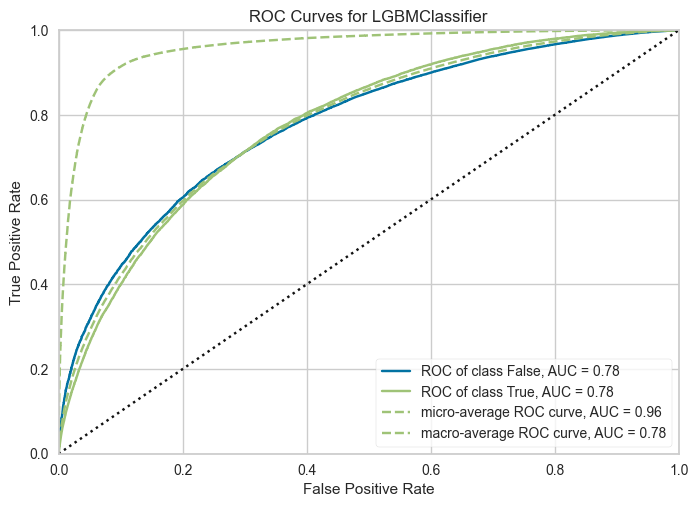

In [9]:
# AUC Plot

plot_model(lightgbm, plot = 'auc')

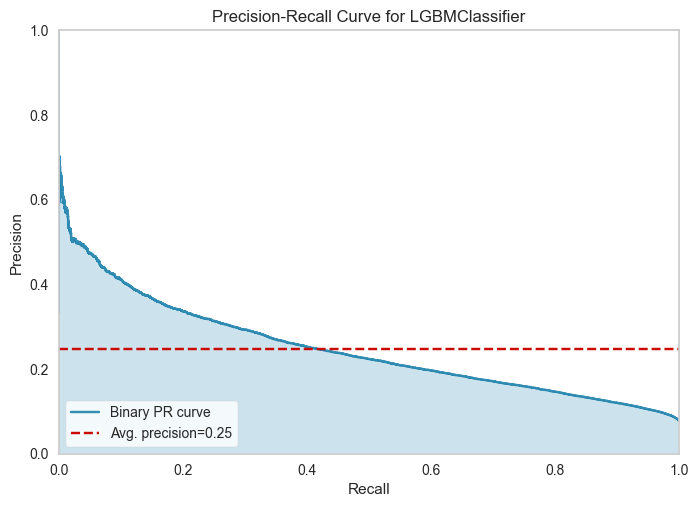

In [10]:
# Precision-Recall Plot

plot_model(lightgbm, plot = 'pr')

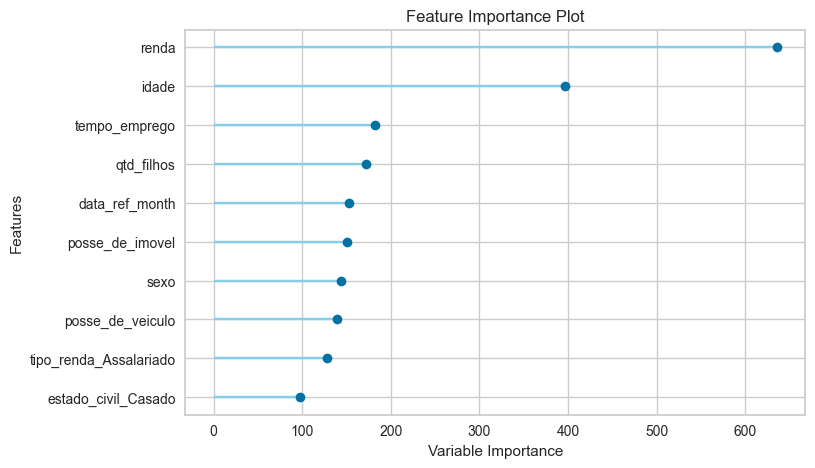

In [11]:
# Importância das variáveis (Feature Importance) Plot

plot_model(lightgbm, plot='feature')

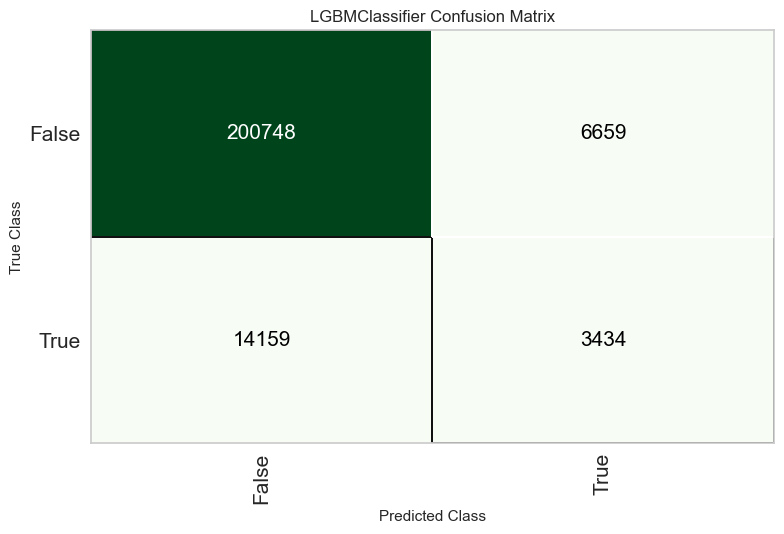

In [12]:
# Matriz de confusão (Confusion matrix)

plot_model(lightgbm, plot = 'confusion_matrix')

In [13]:
# Predict na amostra de teste

predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9075,0.7788,0.1952,0.3402,0.2481,0.2026,0.2115


In [14]:
# Finalizando o modelo

final_lightgbm = finalize_model(lightgbm) # A função treina o modelo dado no dataset inteiro incluindo o hold-out

In [15]:
final_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['data_ref'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImput...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [16]:
save_model(final_lightgbm, 'deployment_09082024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['data_ref'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImput...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rat

In [18]:
# Predict na amostra de teste

predict_model(final_lightgbm, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9004,0.7816,0.2486,0.3223,0.2807,0.2281,0.2304


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873972,1.0,2515.389893,False,0,0.7061
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.189941,False,0,0.7298
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.290039,False,1,0.6220
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.169922,False,0,0.9466
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.080078,False,0,0.6825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,13689,M,N,S,0,Empresário,Superior completo,Casado,Casa,48,3.038356,2.0,2109.989990,False,0,0.7055
749996,2016-03-01,7000,F,N,S,0,Pensionista,Médio,Solteiro,Casa,65,NaN,1.0,1389.390015,False,0,0.5703
749997,2016-03-01,14023,M,S,N,2,Assalariado,Médio,Casado,Casa,43,10.375342,4.0,649.059998,True,1,0.6732
749998,2016-03-01,2396,F,N,S,0,Assalariado,Médio,Viúvo,Casa,56,13.780822,1.0,4216.720215,True,0,0.8855
